## Xception Transfer learning 
Image classification 


In [1]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image  import ImageDataGenerator 
from tensorflow.keras.applications.xception import Xception 
from tensorflow.keras.layers import Dense , GlobalAveragePooling2D , Dropout , Flatten 
from tensorflow.keras.models import Model 
from tensorflow.keras.optimizers import Adam 
import matplotlib.pyplot as plt 
import os 


In [2]:
img_size = (299, 299)
batch_size = 32
epochs = 10


In [3]:
train_data = tf.keras.utils.image_dataset_from_directory(
    "dataset/train" , 
    image_size = img_size,
    batch_size = batch_size
)

val_data = tf.keras.utils.image_dataset_from_directory(
    'dataset/valid' ,
    image_size = img_size , 
    batch_size = batch_size
)

test_data = tf.keras.utils.image_dataset_from_directory(
    'dataset/test',
    image_size = img_size , 
    batch_size = batch_size
)






Found 1275 files belonging to 2 classes.
Found 364 files belonging to 2 classes.
Found 182 files belonging to 2 classes.


In [4]:
num_classes = len(train_data.class_names)

from tensorflow.keras.applications.xception import preprocess_input

In [5]:
from ctypes.util import test


train_data = train_data.map(lambda x, y : (preprocess_input(x) , y) )
val_data = val_data.map(lambda x, y : (preprocess_input(x) , y) )
test_data = test_data.map(lambda x, y : (preprocess_input(x) , y) )



In [6]:
data_augumentation = tf.keras.Sequential([
    tf.keras.layers.RandomZoom(0.2) , 
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(0.2),
    tf.keras.layers.RandomHue(0.2),
    tf.keras.layers.RandomSaturation(0.2),

])


In [7]:
# Apply the dataa augumentation 
train_data = train_data.map(lambda x , y:  (data_augumentation(x , training = True) , y))


In [8]:

base_model = Xception(weights='imagenet' , include_top=False , input_shape = (299 , 299 , 3))


In [9]:
base_model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer_1[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add[0][0]       

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [10]:
# adding base model custom head 

In [11]:
X = base_model.output
X = tf.keras.layers.GlobalAveragePooling2D()(X)
X = tf.keras.layers.Dense(1024, activation='relu')(X)
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(X)

model = Model(inputs = base_model.input , outputs = predictions )


In [12]:
from pickletools import optimize


model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])


In [13]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
    )


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 470s 11s/step - accuracy: 0.6353 - loss: 0.7299 - val_accuracy: 0.6429 - val_loss: 0.8620
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 422s 11s/step - accuracy: 0.6831 - loss: 0.6121 - val_accuracy: 0.7637 - val_loss: 1.1006
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 440s 11s/step - accuracy: 0.6816 - loss: 0.6116 - val_accuracy: 0.6374 - val_loss: 1.2021
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 422s 11s/step - accuracy: 0.7082 - loss: 0.5642 - val_accuracy: 0.8049 - val_loss: 1.0197
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 414s 10s/step - accuracy: 0.7122 - loss: 0.5523 - val_accuracy: 0.7830 - val_loss: 1.6088
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 420s 10s/step - accuracy: 0.7004 - loss: 0.5779 - val_accuracy: 0.7335 - val_loss: 0.6948
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 422s 10s/step - accuracy: 0.7349 - loss: 0.5060 - val_accuracy: 0.8846 - val_loss: 0.2828
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 441s 11s/step - accuracy: 0.7067 - loss: 0.5392 - val_accuracy: 0.

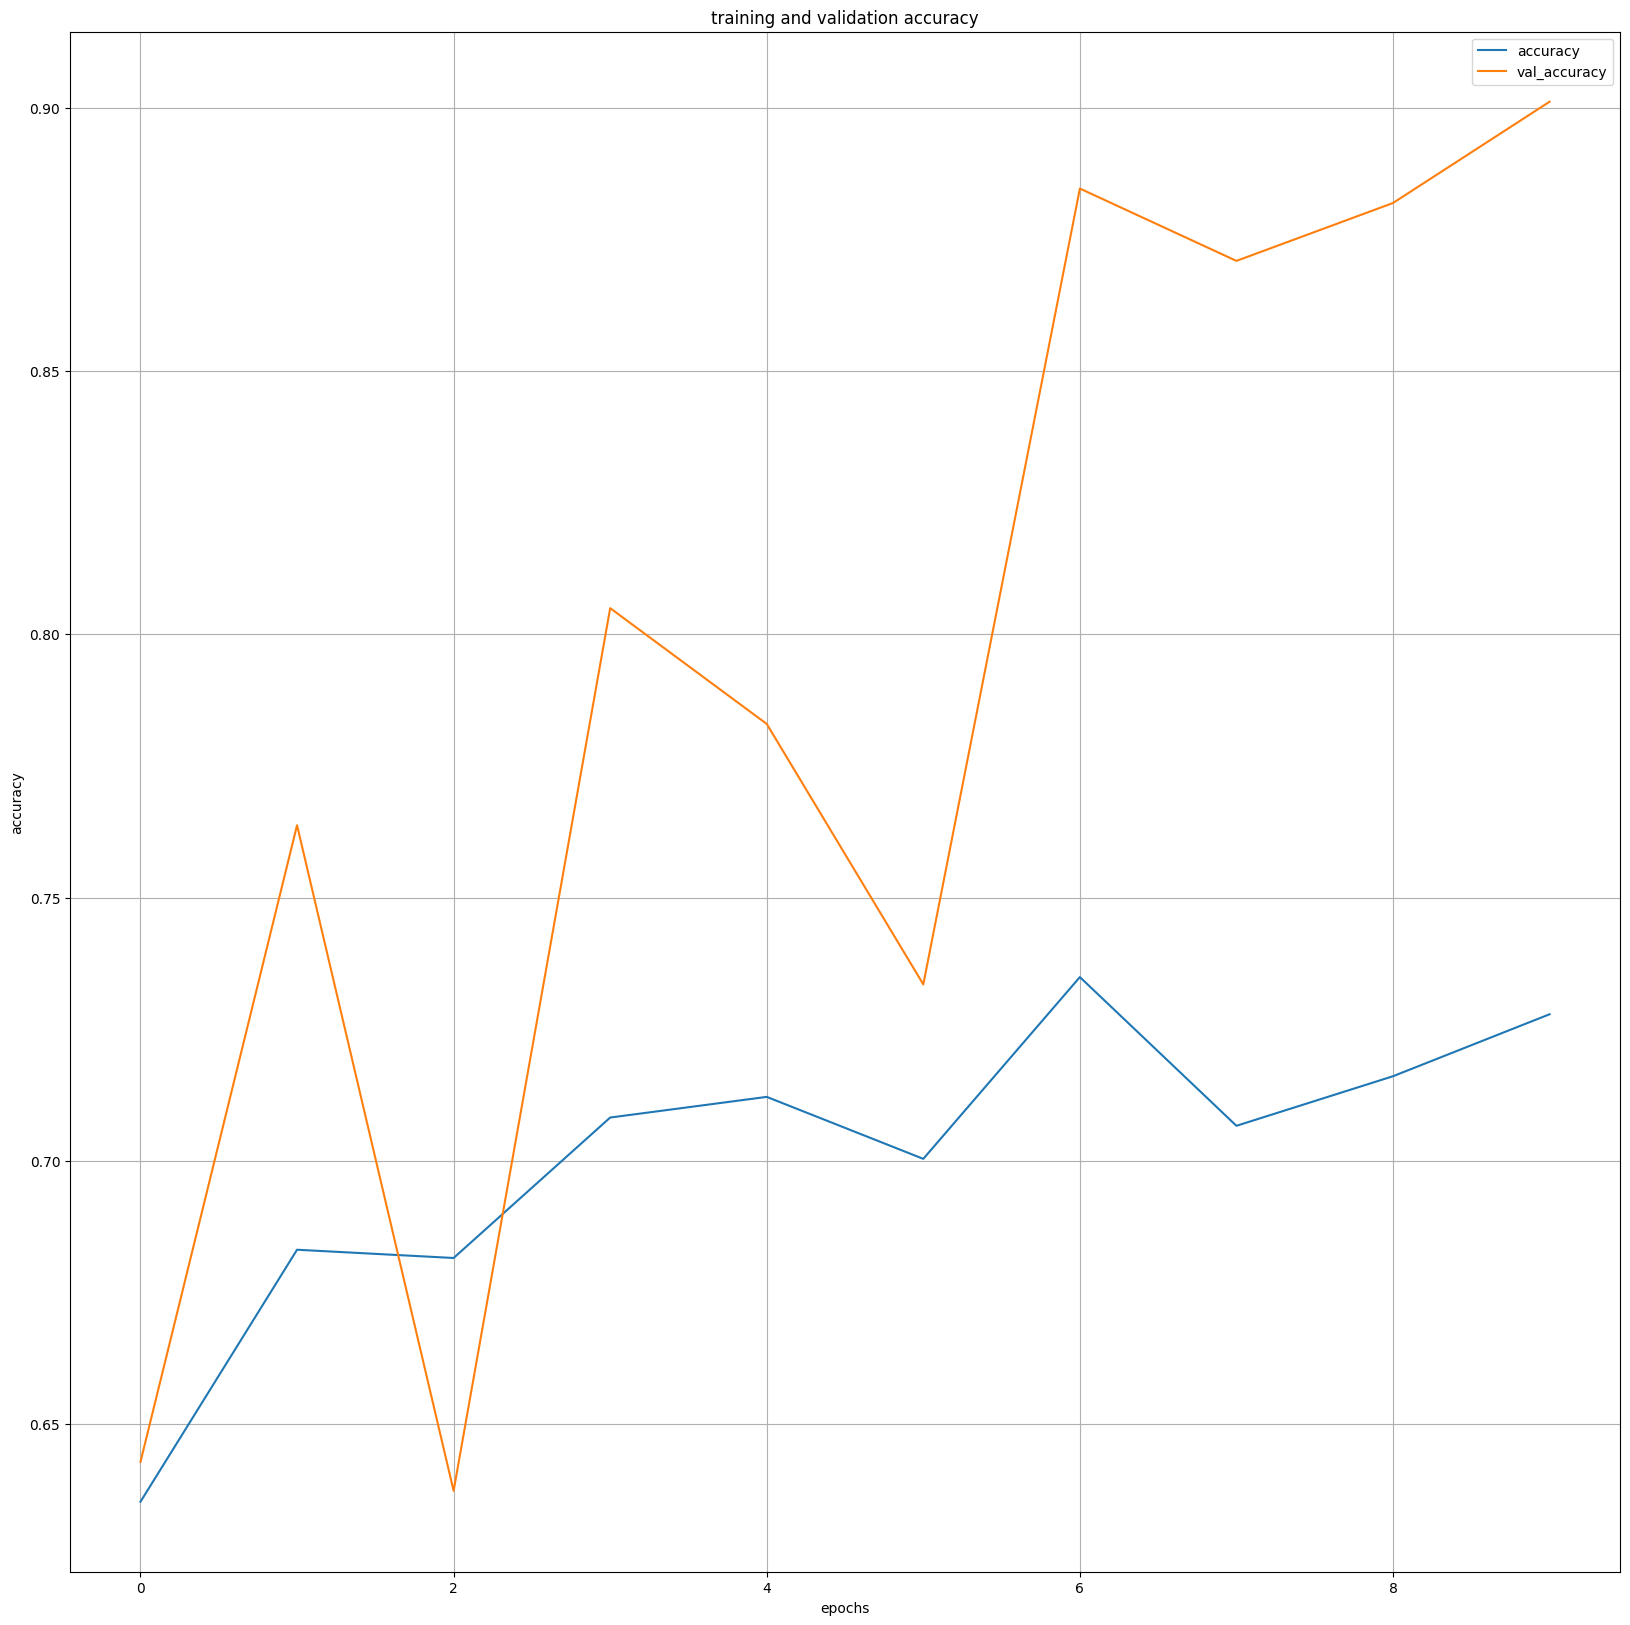

In [14]:
fig = plt.figure(figsize=(20 ,20))
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()


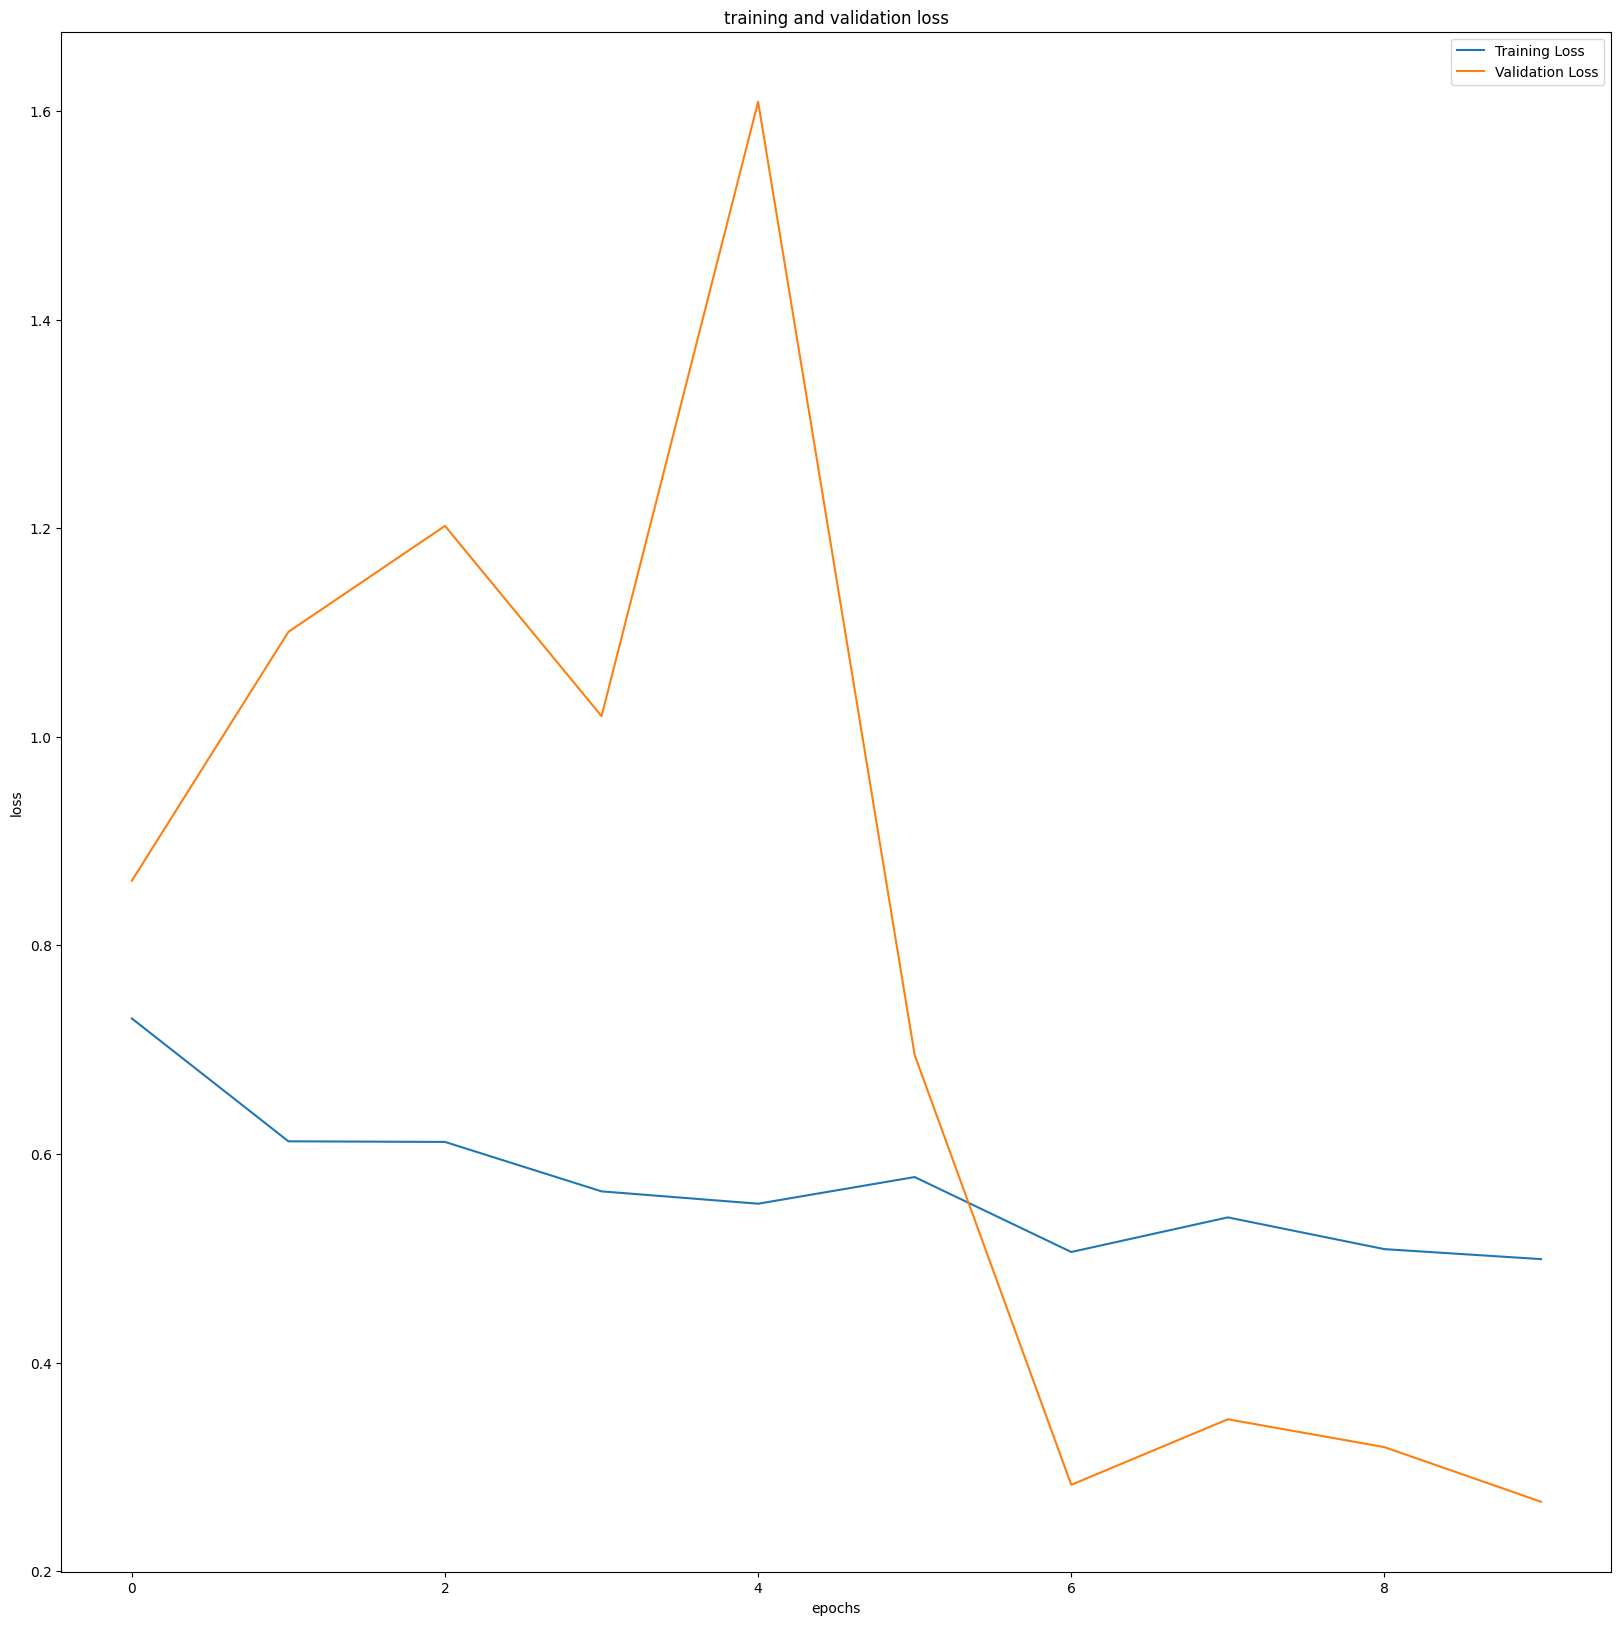

In [15]:
plt.figure(figsize=(20 ,20))
plt.plot(history.history['loss'] , label = 'Training Loss')
plt.plot(history.history['val_loss'] , label = 'Validation Loss')
plt.title("training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
